# Analysis for Continuous Improvement

Author Name: Kaleb White

9-digit PID: 730409578

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should expand the 'explore' section of the website with simplified examples of uses of python in other fields and incentiveze its use in order to make the course more relevant for students in non-compsci fields who will still interact with code.
2. The course should offer Tuesday lectures as optionally in-person in order to increase accesibility for students. 
3. The readings should be removed, as they create excessive work for UTAs and are not relevant to students who are currently engaging with computer science at a basic level.
4. Given that 110 is the gateway course to computer science at UNC, the 110 team should take on the task of planning events that introduce students to the major, especially now that students will have to apply. While this might require more work from the UTAs, the university and students would both benefit from a pool of students who have a better idea of what being a compsci major means.
5. The 110 team should offer optional lessons on git usage from a github, vscode, and command line perspective, because students universally do not understand git, and generally think that someone just spelled 'get' wrong at some point. 

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: Idea # 5

2. Suggestion for how to collect data to support this idea in the future: The survey could include some short-answer questions that ask students to identify more directly parts of the course they have trouble with, such as What aspect of the course do you find the most confusing? or What part of the course do you spend the most time on? Asking students to answer in a single word, and then sorting that word by frequency, could be a great resource for finding out where students need more support.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: Idea # 1: The course should expand the 'explore' section of the website with simplified examples of uses of python in other fields and incentivize its use in order to make the course more relevant for students in non-compsci fields who will still interact with code.

2. This idea is more valuable than the others brainstormed because: Only ideas 1, 2, and 3 can be easily analyzed by the data available. Of 1, 2, and 3, 2 and 3 describe simple changes to the course structure that are directly based on student's preferences, rather than new ideas. 1 requires a more detailed analysis of what comp sci or other STEM majors think of the course as compared to students who are not STEM majors.

## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interweave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [1]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [2]:
from data_utils import read_csv_rows, columnar, column_values, head, select, concat, count, rowlumnar, list_subset, change_list_str_to_int, multi_str_to_int, average_columns

Next, we'll start by reading the survey csv-file into a `list[dict[str, str]]`, a row-oriented table.

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

SURVEY: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

Now that we have our code in a table, it's helpful to consider how we will proceed with the analysis.
The best way to approach the idea will be to break it down into **two parts**. Just as a reminder, the idea is: 
> The course should expand the 'explore' section of the website with simplified examples of uses of python in other fields and incentivize its use in order to make the course more relevant for students in non-compsci fields who will still interact with code.

The two questions that we can split the idea into are: 
<ul>
    <li>What methods of teaching are most valuable to non-compsci students and non-stem students?</li>
    <li>Is the course currently less relevant to non-compsci students?</li>
</ul>


#### 4.1 Changing up the data to make it more usable: compsci_majors, stem_majors, and non_stem_majors

There's a lot data in this new table that we don't need for this analysis. Specifically, we can throw away:
<ol>
    <li>graduation year</li> 
    <li>prereqs</li>
    <li>prior_exp</li> 
    <li>ap_principles</li> 
    <li>ap_a</li>
    <li>other_comp</li>
    <li>prior_time</li>
    <li>languages</li>
    <li>hours_online_social</li>
    <li>hours_online_work</li>
    <li>lesson_time</li>
    <li>sync_perf</li>
    <li>all_sync</li>
    <li>flipped_class</li>
    <li>no_hybrid</li>
    <li>own_notes</li>
    <li>own_examples</li>
    <li>oh_visits</li>
</ol>

There might be some other columns that we don't end up using, but they can be left in for now. These parts of the `SURVEY` table won't be used at all.

We have two functions that we can use for just this purpose. First, we have to switch the row-oriented table to be column-oriented, using the `columnar` function we imported. Then, we can use the `select` function to make remove the columns we don't want.

If we then turn the table back to be row-oriented, we have a nice visual confirmation that we in fact are only seeing the columns that we want to see.

In [15]:
useful_columns: list[str] = ['row', 'unc_status', 'comp_major', 'primary_major', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend']

shortened_results: dict[str, list[str]] = select(columnar(SURVEY), useful_columns)

rowlumnar(shortened_results)

[{'row': '0',
  'unc_status': 'Returning UNC Student',
  'comp_major': 'No',
  'primary_major': 'Mathematics',
  'ls_effective': '7',
  'lsqs_effective': '3',
  'programming_effective': '7',
  'qz_effective': '5',
  'oh_effective': '',
  'tutoring_effective': '',
  'pace': '1',
  'difficulty': '1',
  'understanding': '7',
  'interesting': '5',
  'valuable': '6',
  'would_recommend': '5'},
 {'row': '1',
  'unc_status': 'Returning UNC Student',
  'comp_major': 'No',
  'primary_major': 'Mathematics',
  'ls_effective': '5',
  'lsqs_effective': '5',
  'programming_effective': '5',
  'qz_effective': '5',
  'oh_effective': '7',
  'tutoring_effective': '6',
  'pace': '6',
  'difficulty': '6',
  'understanding': '3',
  'interesting': '4',
  'valuable': '6',
  'would_recommend': '4'},
 {'row': '2',
  'unc_status': 'Incoming First-year Student',
  'comp_major': 'Yes - BA',
  'primary_major': 'Computer Science',
  'ls_effective': '5',
  'lsqs_effective': '6',
  'programming_effective': '7',
  'qz_

Next, to answer both questions, we need to create three new tables, based on these distinctions:
<ol>
    <li>Compsci students</li>
    <li>Non-compsci, stem students</li>
    <li>Non-compsci, non-stem students</li>
</ol>

We can do this by arbitrarily picking out which majors fall into which categories. Then we can write a new helper function which creates a new table excluding the rows containing non-matching datapoints.

In [5]:
shortened_result_row_format: list[dict[str, str]] = rowlumnar(shortened_results)

compsci_majors: list[dict[str, str]] = list_subset(shortened_result_row_format, 'primary_major', ['Computer Science'])

list_of_non_stem_majors: list[str] = ['Advertising and PR', 'Asian Studies', 'Business', 'Communication', 'Communications', 'Cultural Anthropology', 'English', 'HPM', 'Interdisciplinary Studies', 'Linguistics', 'Media and Journalism', 'Medical Anthropology', 'Music Preformance','Peace, War, and Defense', 'Philosophy', 'Political Science', 'Psychology', 'Sports Administration', 'Studio Art', 'Undecided']

stem_majors: list[dict[str, str]] = list_subset(shortened_result_row_format, 'primary_major', list_of_non_stem_majors, False)

non_stem_majors: list[dict[str, str]] = list_subset(shortened_result_row_format, 'primary_major', list_of_non_stem_majors)

We also need to remove the computer science majors from the stem_majors table and the computer science major but not primary major from both the stem_majors and the not_stem_majors tables.


In [6]:
stem_majors = list_subset(stem_majors, 'primary_major', ['Computer Science'], False)
stem_majors = list_subset(stem_majors, 'comp_major', ['Yes - BS', 'Yes - BA', 'Yes - Minor'], False)
non_stem_majors = list_subset(non_stem_majors, 'comp_major', ['Yes - BS', 'Yes - BA', 'Yes - Minor'], False)

Finally, we can establish column-oriented versions of these tables for later use.

In [7]:
column_compsci_majors: dict[str, list[str]] = columnar(compsci_majors)
column_stem_majors: dict[str, list[str]] = columnar(stem_majors)
column_non_stem_majors: dict[str, list[str]] = columnar(non_stem_majors)

#### 4.2 Setting up some basic visualizations

Now that we have our majors divided up, we can do a simple analysis of how valuable the different majors find the class, using the `valuable` metric. For this we need new tables that only contain the column `valuable`. Then, just to start off, we can find the average value of the tables, and plot that.


<BarContainer object of 3 artists>

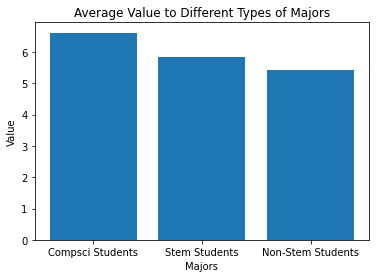

In [8]:
value_compsci: list[str] = column_values(compsci_majors, 'valuable')
value_stem: list[str] = column_values(stem_majors, 'valuable')
value_non_stem: list[str] = column_values(non_stem_majors, 'valuable')

value_compsci_int: list[int] = change_list_str_to_int(value_compsci)
value_stem_int: list[int] = change_list_str_to_int(value_stem)
value_non_stem_int: list[int] = change_list_str_to_int(value_non_stem)

average_value_compsci: float = sum(value_compsci_int) / len(value_compsci_int)
average_value_stem: float = sum(value_stem_int) / len(value_stem_int)
average_value_non_stem: float = sum(value_non_stem_int) / len(value_non_stem_int)

from matplotlib import pyplot

pyplot.title("Average Value to Different Types of Majors")
pyplot.xlabel("Majors")
pyplot.ylabel("Value")
labels: list[str] = ['Compsci Students', 'Stem Students', 'Non-Stem Students']
values: list[float] = [average_value_compsci, average_value_stem, average_value_non_stem]
pyplot.bar(labels, values)

#### 4.3 Answering the first question

Now that we have our data sets, a way to select specific columns, and a way to visualize the data, we can answer our first question.
> What methods of teaching are most valuable to non-compsci students and non-stem students?

For each data set, we just need to select only the columns we need, type that data as int, and average the values into a new list. When all three lists are done, we can graph them to see what methods are "effective in helping student learn the topics of the course". 


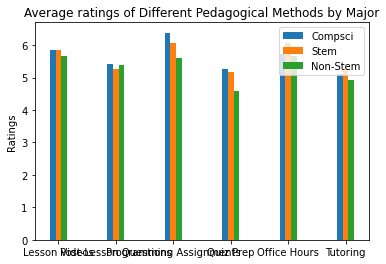

,category,compsci,stem,non_stem
0,ls_effective,5.838565,5.849057,5.649573
1,lsqs_effective,5.417040,5.259434,5.401709
2,programming_effective,6.381166,6.056604,5.598291
3,qz_effective,5.255605,5.155660,4.581197
4,oh_effective,5.718519,6.064935,5.663043
5,tutoring_effective,5.120482,5.288889,4.924528


In [9]:
effectiveness_columns: list[str] = ['ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective']

mot_effectiveness_compsci: dict[str, list[str]] = select(column_compsci_majors, effectiveness_columns)
mot_effectiveness_stem: dict[str, list[str]] = select(column_stem_majors, effectiveness_columns)
mot_effectiveness_non_stem: dict[str, list[str]] = select(column_non_stem_majors, effectiveness_columns)

avg_mot_compsci: list[float] = average_columns(mot_effectiveness_compsci)
avg_mot_stem: list[float] = average_columns(mot_effectiveness_stem)
avg_mot_non_stem: list[float] = average_columns(mot_effectiveness_non_stem)

#pyplot has grouped bar graph functionality which I did not fully understand how to use so I used their example: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

x = np.arange(len(effectiveness_columns))
width: float = 0.1

fig, ax = plt.subplots()
labels = ['Lesson Videos', 'Post-Lesson Questions', 'Programming Assignments', 'Quiz Prep', 'Office Hours', 'Tutoring']
rects1 = ax.bar(x - width, avg_mot_compsci, width, label='Compsci')
rects2 = ax.bar(x, avg_mot_stem, width, label='Stem')
rects3 = ax.bar(x + width, avg_mot_non_stem, width, label='Non-Stem')

ax.set_ylabel('Ratings')
ax.set_title('Average ratings of Different Pedagogical Methods by Major')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

# I was originally using pandas to try and use seaborn to plot the grouped bar graph so it wasn't working. Pandas makes for great visual tables though!
import pandas as pd
data = pd.DataFrame(data={
                     'category' : [effectiveness_columns[0], effectiveness_columns[1], effectiveness_columns[2], effectiveness_columns[3], effectiveness_columns[4], effectiveness_columns[5]],
                     'compsci'  : [avg_mot_compsci[0], avg_mot_compsci[1], avg_mot_compsci[2], avg_mot_compsci[3], avg_mot_compsci[4], avg_mot_compsci[5]],
                     'stem'     : [avg_mot_stem[0], avg_mot_stem[1], avg_mot_stem[2], avg_mot_stem[3], avg_mot_stem[4], avg_mot_stem[5]],
                     'non_stem' : [avg_mot_non_stem[0], avg_mot_non_stem[1], avg_mot_non_stem[2], avg_mot_non_stem[3], avg_mot_non_stem[4], avg_mot_non_stem[5]]
                     })

data

The data does suggest that the programming exercises are one of the most helpful pedagogical methods used in the class. However, on average, `non_stem` students find all teaching methods less useful, including programming. In fact, `non_stem` students have the highest averages in `ls_effective` and `oh_effective`. It's likely that `non_stem` students find timed and graded programming assignments stressful, whereas `compsci` and `stem` students find them more useful. It's not currently easy to measure if this is true, but if there were more explore page projects added, and they were evaluated in the course survey, we could measure those results against a this same analysis on future data and observe the differences, if there are any. We can consider the first question as potentially true - while programming problems are not the most valuable tool to `stem` and `non-stem` students they are a close second or third.


#### Answering the second question: What data from the survey can tell us if the course is currently less relevant to non-compsci students?

There's no direct answer to the question "Do you feel that the course is less relevant to you?" However, the survey offers several other metrics we could possibly use. These include `pace`, `difficulty`, `understanding`, `interesting`, `valuable`, and `would_recommend`. 

One definition of relevance could be solely based on whether or not a student would reccomend the course. Presumably, if a student recommends the course to someone else, they found it relevant to themselves. 

The code block below selects the `would_recommend` column and saves it to a new variable. It then constructs a new graph that uses the `average_columns` function to find the average value of the `would_recommend` columns.


<BarContainer object of 3 artists>

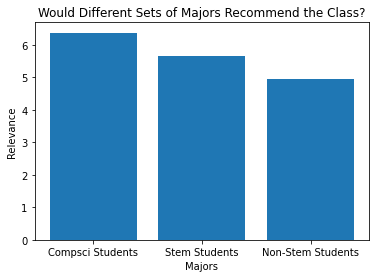

In [10]:
wr_compsci_majors: dict[str, list[str]] = select(column_compsci_majors, ['would_recommend'])
wr_stem_majors: dict[str, list[str]] = select(column_stem_majors, ['would_recommend'])
wr_non_stem_majors: dict[str, list[str]] = select(column_non_stem_majors, ['would_recommend'])


pyplot.title("Would Different Sets of Majors Recommend the Class?")
pyplot.xlabel("Majors")
pyplot.ylabel("Relevance")
labels: list[str] = ['Compsci Students', 'Stem Students', 'Non-Stem Students']
values: list[float] = [average_columns(wr_compsci_majors), average_columns(wr_stem_majors), average_columns(wr_non_stem_majors)]
pyplot.bar(labels, values)

It seems that most people already find the class useful, and would recommend it to others! 

However, our data set might be skewed: what if the students that gave the top 75% of ratings generally enjoy the class and don't need new instructional material to necessarily enjoy it more? It would be interesting to make the same graph, but just with the bottom 25% of values students gave to the `would_recommend` portion of the survey. 

I originally tried to make my own sorting function, realized how hard that is, googled how to do it, and found out that python conveniently has an inbuilt `.sort()` method. In conjunction with the `head` function, we can use these to select out only the bottom 25% of the list (in terms of lowest responses) easily. First, though, these `dict[str, list[str]]` need to be changed to `dict[str, list[int]]`, and the integer amount of approximately (it's rounding from a float, using the `int()` constructor) a quarter of their length needs to be found. 

<BarContainer object of 3 artists>

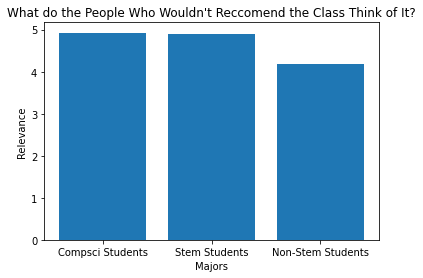

In [11]:
wr_compsci_majors_int: dict[str, list[int]] = multi_str_to_int(wr_compsci_majors)
wr_stem_majors_int: dict[str, list[int]] = multi_str_to_int(wr_stem_majors)
wr_non_stem_majors_int: dict[str, list[int]] = multi_str_to_int(wr_non_stem_majors)

wr_compsci_majors_int['would_recommend'].sort()
wr_stem_majors_int['would_recommend'].sort()
wr_non_stem_majors_int['would_recommend'].sort()

compsci_n: int = int(0.25* len(wr_compsci_majors_int['would_recommend']))
stem_n: int = int(0.25 * len(wr_stem_majors_int['would_recommend']))
non_stem_n: int = int(0.25 * len(wr_non_stem_majors_int['would_recommend']))

wr_cs_25 = head(compsci_n, column_table_int=wr_compsci_majors_int)
wr_s_25 = head(stem_n, column_table_int=wr_compsci_majors_int)
wr_ns_25 = head(non_stem_n, column_table_int=wr_compsci_majors_int)

pyplot.title("What do the People Who Wouldn't Reccomend the Class Think of It?")
pyplot.xlabel("Majors")
pyplot.ylabel("Relevance")
values: list[float] = [average_columns(wr_cs_25), average_columns(wr_s_25), average_columns(wr_ns_25)]
pyplot.bar(labels, values)

Arguably, this does answer question two
>Is the course currently less relevant to non-compsci stem students?

as true, since the non-stem students more likely to not recommend the class, although the average is still around 4. 

What if we make up some alternative metric for relevance? Something is theoretically relevant when it is interesting, valuable, and one is understanding it. Something is not relevant when it's moving too quickly and it's too difficult.

We can write a simple piece of code that adds up `understanding`, `interesting`, and `valuable`, then subtracts `pace` and `difficulty`. First, we'll have to select the columns we need and convert them to `float` form.

<BarContainer object of 3 artists>

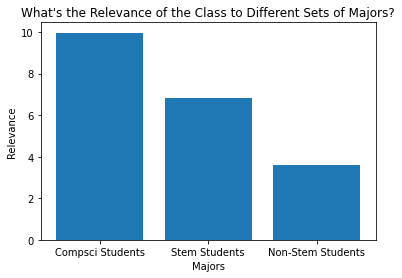

In [12]:
relevance_m2_cs: dict[str, list[int]] = multi_str_to_int(select(column_compsci_majors, ['understanding', 'interesting', 'valuable', 'pace', 'difficulty']))
relevance_m2_s: dict[str, list[int]] = multi_str_to_int(select(column_stem_majors, ['understanding', 'interesting', 'valuable', 'pace', 'difficulty']))
relevance_m2_ns: dict[str, list[int]] = multi_str_to_int(select(column_non_stem_majors, ['understanding', 'interesting', 'valuable', 'pace', 'difficulty']))

def fake_algorithm(table: dict[str, list[int]]) -> list[int]:
    """Real fake algorithm that, given a table of ints, will 'randomly' sum differnt columns!"""
    result_list: list[int] = []
    
    for column in table:
        # Setting up the result to be the length of the first column. This algorithm will not be checking to see if all the columns are the same length!
        if column == list(table.keys())[0]:
            result_list = table[column]

        elif column == 'interesting' or column == 'valuable':
            for i in range(len(table[column])):
                result_list[i] += table[column][i]

        elif column == 'pace' or column == 'difficulty':
            for i in range(len(table[column])):
                result_list[i] -= table[column][i]

        else:
            raise KeyError

    return result_list

relevance_m2_2_cs: dict[str, list[int]] = {'relevance': fake_algorithm(relevance_m2_cs)}
relevance_m2_2_s: dict[str, list[int]] = {'relevance': fake_algorithm(relevance_m2_s)}
relevance_m2_2_ns: dict[str, list[int]]= {'relevance': fake_algorithm(relevance_m2_ns)}

pyplot.title("What's the Relevance of the Class to Different Sets of Majors?")
pyplot.xlabel("Majors")
pyplot.ylabel("Relevance")
values: list[float] = [average_columns(relevance_m2_2_cs), average_columns(relevance_m2_2_s), average_columns(relevance_m2_2_ns)]
pyplot.bar(labels, values)

This metric of relevance seems to exaggerate the issues non-stem students may be having. Since we can mostly reuse the code from finding the bottom 25% of responses to the `would_recommend` category, we might as well conduct that analysis as well. We don't need to calculate what a quarter of the table lengths are again, since we haven't done anything to change the length of the actual columns. Again, we'll use the inbuilt `.sort()` method to sort the tables, only take the lowest 25% of values using the `head` function, and then plot it - the only difference is different tables.

<BarContainer object of 3 artists>

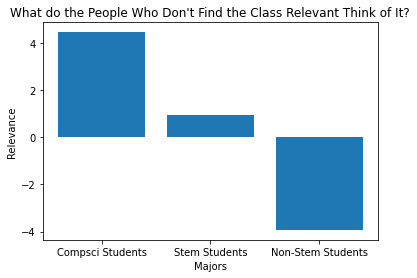

In [13]:
relevance_m2_2_cs['relevance'].sort()
relevance_m2_2_s['relevance'].sort()
relevance_m2_2_ns['relevance'].sort()

# It's a lot of underscores: relevance_metric2_2_compsci(majors)_25%
r_m2_2_cs_25 = head(compsci_n, column_table_int=relevance_m2_2_cs)
r_m2_2_s_25 = head(stem_n, column_table_int=relevance_m2_2_s)
r_m2_2_ns_25 = head(non_stem_n, column_table_int=relevance_m2_2_ns)

pyplot.title("What do the People Who Don't Find the Class Relevant Think of It?")
pyplot.xlabel("Majors")
pyplot.ylabel("Relevance")
values: list[float] = [average_columns(r_m2_2_cs_25), average_columns(r_m2_2_s_25), average_columns(r_m2_2_ns_25)]
pyplot.bar(labels, values)

>Is the course currently less relevant to non-compsci stem students?

The answer seems to be yes, especially for those students that are particularly struggling in the course. How many students does 'non-stem students' encompass in the above metric?

In [14]:
non_stem_n

29

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



The data analysis that I conducted *definitively* showed that:
* Programming assignments, lessons, and office hours are the highest valued pedagogical methods in the class among all students. Programming assignments are more valued by stem and compsci majors, whereas non-stem majors value office hours and the lessons more.
* Non-stem majors find the class less relevant by two arbitrary measures.

It's not necessarily true that 
> The course should expand the 'explore' section of the website with simplified examples of uses of python in other fields and incentivize its use in order to make the course more relevant for students in non-compsci fields who will still interact with code.

follows from these premises. For example, my data doesn't directly conclude that non-stem students actually like programming assignments - in fact, it concludes that non-stem students like these assignments less. 

Considering my personal experience interacting with students in the class, I would suggest the deadlines and stresses of these assignments - not the format itself - is the reason non-stem students value them less. 

So while my idea doesn't necessarily follow from my data, is doesn't not follow, either. It could be that focused, extra-credit incentivized programming assignments that deal with specific libraries common to, say, nursing students' real-world interaction with tech would be much more valued than the current structure that the programming assignments are in.

It is possible to collect more data which could thouroughly support my idea by releasing a new tutorial on the explore page of the website targeted towards specifically, for example, history majors, giving a few points of extra credit for completing it, and requiring a survey of the experience at the end. It would be easy to compare that data to the data for general programming assignments above.

Classes usually struggle to implement fair grading policies that satisfy administration and student needs. Adding a course section specifically targeted towards certain students who are perceived to be needing help could be seen as unfair and frustrate students and administration alike. It would be a process of fine-tuning the explore page options to offer the right amount of extra credit and offer options to a variety of majors, but managing to add additional supports to bring in those that are potentially being left behind would be a feat that nearly no college courses in the sciences accomplish.
